My dataset is concerned with the scores of all the videogames released until 2016 and their global sales.

Firstly, we will notice that some games don't have scores, so I replaced the empty values with the column's mode,
which is a score of 70.0.

In [2]:
import pandas as pd 
df = pd.read_csv('Video_Games_Sales2.csv')
df = df.loc[:,['Name','Critic_Score','Global_Sales']] 
# score_mode = df.Critic_Score.mode()[0]
# df.Critic_Score.fillna(score_mode, inplace=True)
df.dropna(subset=['Critic_Score'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          8137 non-null   object 
 1   Critic_Score  8137 non-null   float64
 2   Global_Sales  8137 non-null   float64
dtypes: float64(2), object(1)
memory usage: 254.3+ KB


Now I will represent the new dataframe with a scatter plot chart.

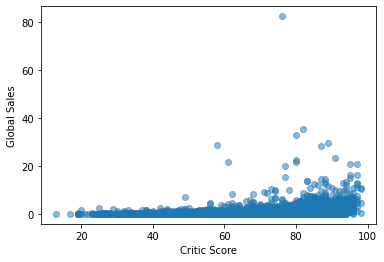

,Name,Critic_Score,Global_Sales
0,Wii Sports,76.0,82.53
2,Mario Kart Wii,82.0,35.52
3,Wii Sports Resort,80.0,32.77
6,New Super Mario Bros.,89.0,29.80
7,Wii Play,58.0,28.92


In [6]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = pd.DataFrame(df, columns=["Critic_Score"])
y = pd.DataFrame(df, columns=["Global_Sales"])

plt.scatter(x, y, alpha = 0.5)

plt.xlabel("Critic Score")
plt.ylabel("Global Sales")

plt.show()
df.head()

Now the Linear Regression:

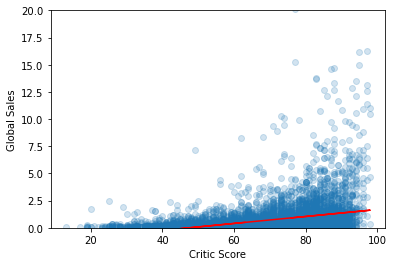

In [4]:
reg = LinearRegression()
reg.fit(x, y)
reg.coef_
reg.intercept_

plt.scatter(x, y, alpha = 0.2)

plt.xlabel("Critic Score")
plt.ylabel("Global Sales")
plt.ylim(0,20)
plt.plot(x, reg.predict(x), color='red')

plt.show()

Prediction:

In [7]:
X = df[['Critic_Score']]
Y = df['Global_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, Y_train)



LinearRegression()

In [8]:
model_score = model.score(X_test, Y_test)
print(f'Model R-squared score: {model_score:.2f}')

Model R-squared score: 0.13
